In [30]:
import torch
import torchvision
import torchvision.transforms as transforms

In [31]:
transform = transforms.Compose([
    transforms.ColorJitter(0.2, 0.2, 0.2),    # 随机颜色变换
    transforms.RandomRotation(5),    # 随机旋转
    transforms.ToTensor()
])

batch_size = 512

trainset = torchvision.datasets.CIFAR10(root='./', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


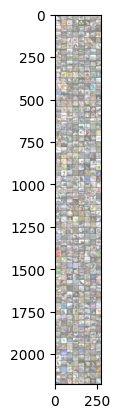

plane plane plane frog  deer  cat   ship  frog  cat   dog   ship  truck frog  frog  truck horse truck dog   horse cat   ship  ship  horse ship  plane car   truck deer  car   cat   horse cat   truck frog  cat   horse car   cat   dog   dog   car   horse horse dog   horse cat   dog   deer  horse deer  car   horse car   cat   ship  frog  horse frog  truck frog  horse ship  car   ship  deer  dog   ship  car   ship  plane dog   frog  dog   truck deer  frog  truck car   horse truck dog   dog   bird  cat   car   horse ship  cat   cat   frog  frog  bird  car   horse car   ship  cat   frog  frog  car   truck ship  cat   ship  plane car   car   truck truck bird  cat   cat   ship  truck horse cat   frog  deer  car   horse dog   frog  frog  car   cat   horse cat   car   ship  horse deer  deer  dog   truck dog   car   frog  ship  horse bird  car   dog   dog   horse horse car   bird  car   cat   cat   horse horse car   deer  car   car   car   plane ship  truck dog   truck horse dog   cat   dog   frog

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [36]:
net = torchvision.models.resnet18(num_classes=10).cuda()
net.train()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [38]:
import torch.optim as optim

criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [39]:
for epoch in range(40):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs.cuda())
        loss = criterion(outputs, labels.cuda())
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 100 == 1:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:}')
            running_loss = 0.0

print('Finished Training')

[1,     2] loss: 0.0024900200366973877
[2,     2] loss: 0.0011731335520744324
[3,     2] loss: 0.0008961859047412872
[4,     2] loss: 0.0007919989228248596
[5,     2] loss: 0.0006521021127700806
[6,     2] loss: 0.0005975512862205505
[7,     2] loss: 0.0005215624570846558
[8,     2] loss: 0.0004124345779418945
[9,     2] loss: 0.0003601471781730652
[10,     2] loss: 0.0002860862612724304
[11,     2] loss: 0.0002592075765132904
[12,     2] loss: 0.000239640474319458
[13,     2] loss: 0.0002130374386906624
[14,     2] loss: 0.00017479712516069412
[15,     2] loss: 0.00015454009175300598
[16,     2] loss: 0.00013942693918943404
[17,     2] loss: 0.00012509535625576974
[18,     2] loss: 0.00010020817443728447
[19,     2] loss: 0.000105727419257164
[20,     2] loss: 9.835483133792877e-05
[21,     2] loss: 9.359611198306083e-05
[22,     2] loss: 0.00010632868856191635
[23,     2] loss: 5.520102567970753e-05
[24,     2] loss: 0.00010590957105159759
[25,     2] loss: 8.238548412919045e-05
[26,

In [40]:
PATH = './cifar10_resnet18.pth'
torch.save(net.state_dict(), PATH)